In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import glob

path = "/content/drive/MyDrive/Archive"
all_files = glob.glob(os.path.join(path, "*.csv"))
dfs = []

for filename in all_files:
    frame = pd.read_csv(filename, index_col=None, header=0)
    dfs.append(frame)

df = pd.concat(dfs, axis=0, ignore_index=True)
df = df.sample(frac=1, random_state=42)

df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1360,z12muzijetuwf3qgm04ce1nafxvtj535ao40k,Trollsif Stalin,2015-05-21T01:05:19.225000,I believe that soccer promotes terrorism. Bad ...,0
1703,z12tclby1nuyflgbw04cdnyg3zfvefn5lrg0k,Technibility,2014-09-12T21:08:47,Great video by a great artist in Katy Perry! A...,1
1146,z13uu5dyinf2yplb504civzz5obby5baucg,Simply Terrell,2014-12-26T11:17:56.976000,Subscribe to my channel <br />Tweet &amp; Foll...,1
1758,z13ighawfwy5y5t5a04ccnp5dozetzfpq0g,Snipe Last,2014-09-22T19:34:46,why the elephant have a broken horn﻿,0
374,z13ehf4g5z2rivxhm04cfjdyhl2kwljzsjs,Andrés Nuñez,2015-05-21T02:11:54.710000,super﻿,0


In [2]:
df = df[["CONTENT", "CLASS"]]

In [3]:
df.shape

(1956, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 1360 to 1126
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [5]:
df.CLASS.value_counts("0")

1    0.513804
0    0.486196
Name: CLASS, dtype: float64

In [6]:
from sklearn.model_selection import  train_test_split
train_data,test_data = train_test_split(df, test_size=0.2,stratify=df["CLASS"])

In [7]:
train_data.shape
print(len(train_data))
print(train_data)

1564
                                                CONTENT  CLASS
611                          I found out this song now﻿      0
1471                                                 :)      0
10                         Help me get 50 subs please ﻿      1
1256  5 years later i still love this song <br />~Ax...      0
1557        Subscribe me, I will? subscribe you back!!!      1
...                                                 ...    ...
616   http://www.amazon.co.uk/gp/offer-listing/B00EC...      1
1707                     I love KATY PERRY &lt;3 &lt;3﻿      0
1010  Guys lmfaois going to have a reunion on June/2...      1
593   I think this is now a place to promote channel...      0
955                                   my favorite song﻿      0

[1564 rows x 2 columns]


In [8]:
print(test_data.shape)
print(len(test_data))
print(test_data)

(392, 2)
392
                                                CONTENT  CLASS
1641  katy perry does remind me of a tiger,like as i...      0
776   Haha its so funny to see the salt of westerner...      0
1453                               Your a fucking bitch      0
735   If I get 100 subscribers, I will summon Freddy...      1
1497                                     She is perfect      0
...                                                 ...    ...
541   Does anyone here use gift cards like Amazon, i...      1
1922  I love this song so much!:-D I've heard it so ...      0
934                          you cant stop the shuffle﻿      0
751   im sorry for the spam but My name is Jenny. I ...      1
45    I personally have never been in a abusive rela...      1

[392 rows x 2 columns]


In [9]:
train_data.CLASS.value_counts("0")

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

In [10]:
test_data.CLASS.value_counts("0")

1    0.512755
0    0.487245
Name: CLASS, dtype: float64

In [11]:
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00


In [12]:
# Modeling
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler

# Progress bar
from tqdm.auto import tqdm

# Hugging Face Dataset
from datasets import Dataset



In [13]:
hg_train_data = Dataset.from_pandas(train_data)
hg_test_data = Dataset.from_pandas(test_data)

In [14]:
print(len(hg_train_data))
hg_train_data[0]

1564


{'CONTENT': 'I found out this song now\ufeff',
 'CLASS': 0,
 '__index_level_0__': 611}

In [15]:
print(len(hg_test_data))
hg_test_data[0]

392


{'CONTENT': 'katy perry does remind me of a tiger,like as if its her spirit animal :3 &lt;3\ufeff',
 'CLASS': 0,
 '__index_level_0__': 1641}

In [16]:
df.iloc[[1092]]

,CONTENT,CLASS
42,Check out this video on YouTube<br /><br /><br...,1


In [17]:
#Tokenizer from a pretrained model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Take a look at the tokenizer
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

1200


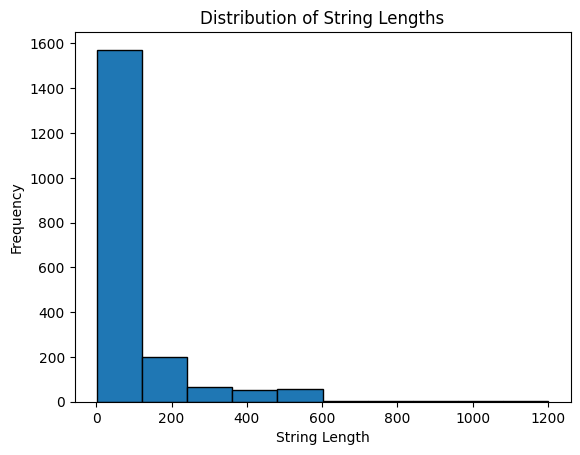

In [18]:
import matplotlib.pyplot as plt

print(df.CONTENT.apply(len).max())

lengths = df.CONTENT.apply(len)
plt.hist(lengths, bins=10, edgecolor='black')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.title('Distribution of String Lengths')
plt.show()

In [19]:
length = 512

def tokenize_dataset(data):
    return tokenizer(data["CONTENT"],
                     max_length=length,
                     truncation=True,
                     pad_to_max_length=True,
                     padding="max_length")

# Tokenize the dataset
dataset_train = hg_train_data.map(tokenize_dataset)
dataset_test = hg_test_data.map(tokenize_dataset)

Map:   0%|          | 0/1564 [00:00<?, ? examples/s]

Map:   0%|          | 0/392 [00:00<?, ? examples/s]

In [20]:
print(dataset_train)
print(dataset_test)

Dataset({
    features: ['CONTENT', 'CLASS', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1564
})
Dataset({
    features: ['CONTENT', 'CLASS', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 392
})


In [21]:
print(type(dataset_train))

<class 'datasets.arrow_dataset.Dataset'>


In [22]:
dataset_train = dataset_train.remove_columns(["CONTENT", "__index_level_0__"])
dataset_test = dataset_test.remove_columns(["CONTENT", "__index_level_0__"])

In [23]:
dataset_train = dataset_train.rename_column("CLASS", "labels")
dataset_test = dataset_test.rename_column("CLASS", "labels")

In [24]:
# Change the format to PyTorch tensors
dataset_train.set_format("torch")
dataset_test.set_format("torch")

# Take a look at the data
print(dataset_train)
print(dataset_test)

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1564
})
Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 392
})


In [25]:
torch.cuda.empty_cache()

# DataLoader
train_dataloader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=4)
eval_dataloader = DataLoader(dataset=dataset_test, batch_size=32)

In [26]:
# Load model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
# Number of epochs
num_epochs = 10

# Number of training steps
num_training_steps = num_epochs * len(train_dataloader)

# Optimizer
optimizer = AdamW(params=model.parameters(), lr=5e-6)

# Set up the learning rate scheduler
lr_scheduler = get_scheduler(name="linear",
                             optimizer=optimizer,
                             num_warmup_steps=0,
                             num_training_steps=num_training_steps)

# Use GPU if it is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)


if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"Using GPU: {gpu_name}")
else:
    print("No GPU available")

Using GPU: Tesla T4


In [28]:
num_training_steps

3910

Training Progress:   0%|          | 0/3910 [00:00<?, ?it/s]

Epoch 1/10 - Training Loss: 0.3314
Epoch 2/10 - Training Loss: 0.0987
Epoch 3/10 - Training Loss: 0.0440
Epoch 4/10 - Training Loss: 0.0264
Epoch 5/10 - Training Loss: 0.0121
Epoch 6/10 - Training Loss: 0.0056
Epoch 7/10 - Training Loss: 0.0045
Epoch 8/10 - Training Loss: 0.0027
Epoch 9/10 - Training Loss: 0.0022
Epoch 10/10 - Training Loss: 0.0025


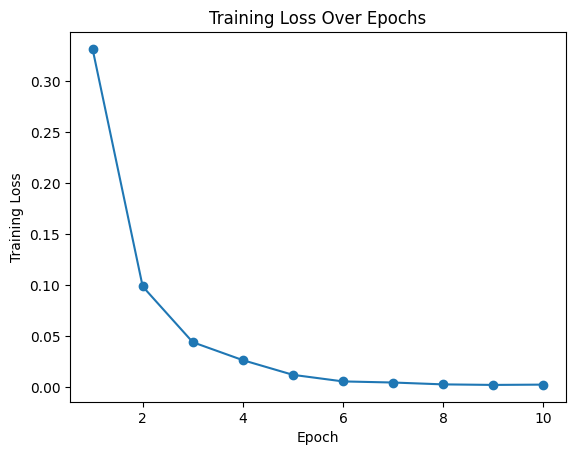

In [29]:
#Set the progress bar
progress_bar = tqdm(range(num_training_steps),desc = "Training Progress")

training_losses = []  # To store losses for each batch
# Tells the model that we are training the model
model.train()
# Loop through the epochs
for epoch in range(num_epochs):
    # Loop through the batches
    epoch_loss = 0.0  # Initialize epoch loss
    for batch in train_dataloader:
        # Get the batch
        batch = {k: v.to(device) for k, v in batch.items()}
        # Compute the model output for the batch
        outputs = model(**batch)
        # Loss computed by the model

        loss = outputs.loss

        epoch_loss += loss.item()
        # backpropagates the error to calculate gradients
        loss.backward()
        # Update the model weights
        optimizer.step()
        # Learning rate scheduler
        lr_scheduler.step()
        # Clear the gradients
        optimizer.zero_grad()
        # Update the progress bar
        progress_bar.update(1)

  # Calculate average loss for the epoch
    epoch_loss /= len(train_dataloader)
    training_losses.append(epoch_loss)
    print(f"Epoch {epoch + 1}/{num_epochs} - Training Loss: {epoch_loss:.4f}")


progress_bar.close()

# Plot the training loss over epochs if desired
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), training_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs')
plt.show()


In [30]:
# Model performance evaluation
import evaluate

# Load the evaluation metric
metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("f1")
metric3 = evaluate.load("recall")

In [31]:
# Tells the model that we are evaluting the model performance
model.eval()

#  A list for all logits
logits_all = []

# A list for all predicted probabilities
predicted_prob_all = []

# A list for all predicted labels
predictions_all = []

In [32]:
for batch in eval_dataloader:
    # Get the batch
    batch = {k: v.to(device) for k, v in batch.items()}
    # Disable the gradient calculation
    with torch.no_grad():
        # Compute the model output
        outputs = model(**batch)
    # Get the logits
    logits = outputs.logits
    # Append the logits batch to the list
    logits_all.append(logits)
    # Get the predicted probabilities for the batch
    predicted_prob = torch.softmax(logits, dim=1)
    # Append the predicted probabilities for the batch to all the predicted probabilities
    predicted_prob_all.append(predicted_prob)
    # Get the predicted labels for the batch
    predictions = torch.argmax(logits, dim=-1)
    # Append the predicted labels for the batch to all the predictions
    predictions_all.append(predictions)
    # Add the prediction batch to the evaluation metric
    metric1.add_batch(predictions=predictions, references=batch["labels"])
    metric2.add_batch(predictions=predictions, references=batch["labels"])
    metric3.add_batch(predictions=predictions, references=batch["labels"])

# Compute the metric
print(metric1.compute())
print(metric2.compute())
print(metric3.compute())

{'accuracy': 0.9719387755102041}
{'f1': 0.972568578553616}
{'recall': 0.9701492537313433}


In [33]:
# Take a look at the logits
logits_all[:5]

[tensor([[ 3.9079, -3.1044],
         [ 2.5765, -2.4495],
         [ 3.5727, -3.2288],
         [-3.4387,  3.3489],
         [ 3.8341, -3.2221],
         [ 2.6190, -2.2009],
         [ 3.6122, -3.1459],
         [ 3.8269, -3.3460],
         [ 3.6812, -3.2144],
         [ 3.4286, -2.9174],
         [ 3.6081, -3.0233],
         [-3.6813,  3.4982],
         [-3.9738,  3.5799],
         [-4.0414,  3.6492],
         [ 2.9541, -2.4313],
         [ 3.6917, -3.1860],
         [-3.6507,  3.5435],
         [-3.7879,  3.5010],
         [-3.7890,  3.6080],
         [-3.7946,  3.5995],
         [ 3.3880, -2.8260],
         [ 3.5304, -3.0758],
         [-3.8624,  3.3243],
         [ 3.7446, -3.1889],
         [ 3.7123, -3.2039],
         [ 3.6743, -2.8575],
         [ 3.8217, -3.2317],
         [-4.0093,  3.4727],
         [-2.9726,  2.7656],
         [ 3.8018, -3.3599],
         [ 3.8396, -3.3210],
         [ 3.5829, -3.1261]], device='cuda:0'),
 tensor([[-3.9042,  3.5533],
         [ 3.5730, -3.11

In [34]:
predicted_prob_all[:5]

[tensor([[9.9910e-01, 8.9994e-04],
         [9.9348e-01, 6.5216e-03],
         [9.9889e-01, 1.1109e-03],
         [1.1264e-03, 9.9887e-01],
         [9.9914e-01, 8.6126e-04],
         [9.9200e-01, 8.0028e-03],
         [9.9884e-01, 1.1601e-03],
         [9.9923e-01, 7.6644e-04],
         [9.9899e-01, 1.0112e-03],
         [9.9825e-01, 1.7507e-03],
         [9.9868e-01, 1.3166e-03],
         [7.6143e-04, 9.9924e-01],
         [5.2391e-04, 9.9948e-01],
         [4.5692e-04, 9.9954e-01],
         [9.9544e-01, 4.5620e-03],
         [9.9897e-01, 1.0294e-03],
         [7.5041e-04, 9.9925e-01],
         [6.8262e-04, 9.9932e-01],
         [6.1275e-04, 9.9939e-01],
         [6.1447e-04, 9.9939e-01],
         [9.9800e-01, 1.9973e-03],
         [9.9865e-01, 1.3502e-03],
         [7.5603e-04, 9.9924e-01],
         [9.9903e-01, 9.7362e-04],
         [9.9901e-01, 9.9059e-04],
         [9.9855e-01, 1.4543e-03],
         [9.9914e-01, 8.6371e-04],
         [5.6276e-04, 9.9944e-01],
         [3.2102e-03

In [35]:
predictions_all[:5]

[tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
         0, 0, 0, 1, 1, 0, 0, 0], device='cuda:0'),
 tensor([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
         0, 1, 0, 0, 1, 0, 1, 1], device='cuda:0'),
 tensor([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
         1, 0, 1, 0, 0, 0, 0, 1], device='cuda:0'),
 tensor([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 1, 1, 1, 0, 1, 0], device='cuda:0'),
 tensor([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
         0, 0, 1, 1, 1, 1, 1, 0], device='cuda:0')]

In [36]:
tokenizer.save_pretrained('./sentiment_transfer_learning_pytorch/')

# Save model
model.save_pretrained('./sentiment_transfer_learning_pytorch/')

In [37]:
# Load tokenizer


tokenizer = AutoTokenizer.from_pretrained("./sentiment_transfer_learning_pytorch/")

# Load model
loaded_model = AutoModelForSequenceClassification.from_pretrained('./sentiment_transfer_learning_pytorch/')





In [38]:
# Input text for inference
input_text = "This is a negative review."

# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = loaded_model(**inputs)

# Get the predicted class (label) index
predicted_class_idx = torch.argmax(outputs.logits).item()

# Print the predicted class
print("Predicted class index:", predicted_class_idx)

Predicted class index: 0
